## start

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


just paste the locataction you allocated for the google drive file, that you have been created as shourcut link based on readme description 

In [4]:
proj_path = "/content/gdrive/MyDrive/projects"

In [5]:
import os 
import sys
os.chdir('/content/gdrive/MyDrive/projects')
sys.path.append('/content/gdrive/MyDrive/Models')
from attack.cleverhans_attack import *
from autoencoder import aphl 
from deepmimo import Deep_MIMO
from mist import MIST
from pe import PE
import numpy as np

In [6]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.title('Training performance')
  plt.plot(history.epoch, history.history['loss'], label='train loss+error')
  plt.plot(history.epoch, history.history['val_loss'], label='val_error')
  plt.legend()

## aphl

In [5]:
##max num_train_limit =>220000
a1 = aphl(proj_path+"/RML2016.10a/",num_train_limit = 110000)
print("training aghl")
history = a1.train_gpu(epochs = 100 ,batch_size=1024, get_data_build =True )

training aghl
getting data
getting data from RML2016
start to fit
Epoch 1/100
65/65 - 15s - loss: 2.1742 - categorical_crossentropy: 2.1742 - val_loss: 2.0287 - val_categorical_crossentropy: 2.0287 - 15s/epoch - 234ms/step
Epoch 2/100
65/65 - 4s - loss: 1.9590 - categorical_crossentropy: 1.9590 - val_loss: 1.8708 - val_categorical_crossentropy: 1.8708 - 4s/epoch - 58ms/step
Epoch 3/100
65/65 - 4s - loss: 1.8228 - categorical_crossentropy: 1.8228 - val_loss: 1.7705 - val_categorical_crossentropy: 1.7705 - 4s/epoch - 58ms/step
Epoch 4/100
65/65 - 4s - loss: 1.7535 - categorical_crossentropy: 1.7535 - val_loss: 1.7369 - val_categorical_crossentropy: 1.7369 - 4s/epoch - 68ms/step
Epoch 5/100
65/65 - 4s - loss: 1.6862 - categorical_crossentropy: 1.6862 - val_loss: 1.6753 - val_categorical_crossentropy: 1.6753 - 4s/epoch - 68ms/step
Epoch 6/100
65/65 - 4s - loss: 1.6283 - categorical_crossentropy: 1.6283 - val_loss: 1.6349 - val_categorical_crossentropy: 1.6349 - 4s/epoch - 59ms/step
Epoch 7

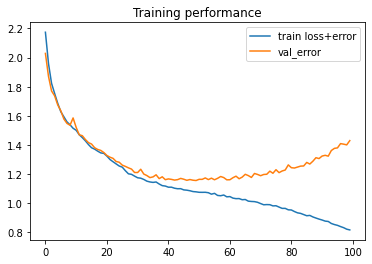

In [6]:
## toDO fix the axis title
plot_history(history)

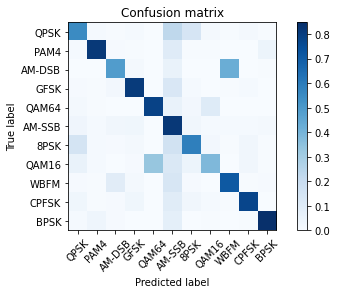

In [7]:
a1.plot()

In [8]:
print("attack")
att = Attack_handler(nb_epochs= 5,
                     eps = 0.05,
                     adv_train = True ,
                     batch = 64)
d = att.attack(a1,clean_limit=256,
                     trianed_weight = True)


attack
setting batches
getting clean data form model
train data shape (clean): train  (687, 64, 2, 128)  test (687, 64, 11)
test data shape : train  (2, 64, 2, 128)  test (2, 64, 11)
Train model with adversarial training
43968/50000 [=========================>....] - ETA: 23s - loss: 2.4715Evaluate on clean and adversarial data
aphl
   64/50000 [..............................] - ETA: 3:49
test on batch 0
if data was not manipulated 0.0 
test acc on clean examples : 2.320157289505005
test acc on FGM adversarial examples : 2.320157289505005
test acc on PGD adversarial examples : 2.320157289505005
  128/50000 [..............................] - ETA: 3:51
test on batch 1
if data was not manipulated 0.0 
test acc on clean examples : 2.3256964683532715
test acc on FGM adversarial examples : 2.3256964683532715
test acc on PGD adversarial examples : 2.3256964683532715


In [ ]:
del a1 

## DEEPMIMO

In [9]:
mim1 = Deep_MIMO(proj_path+    '/DeepMIMO2',
                                active_BS = 64,
                                user_row_first = 2,
                                user_row_last = 10,
                                bandwidth = 0.05,
                                subcarriers = 64 ,
                                subcarriers_sampling = 1 ,
                                subcarriers_limit = 32,
                                num_paths = 1,
                                num_set_antenna_M = 2,
                                MLP_DroupOut = 0.1)

print("training DEEPMIMO")
history = mim1.train_gpu(epochs =100,batch_size=1024)

training DEEPMIMO
getting data

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6795.10it/s]



Basestation 2

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6210.47it/s]



Basestation 3

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6325.04it/s]



Basestation 4

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6048.48it/s]



Basestation 5

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6630.68it/s]



Basestation 6

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6639.84it/s]



Basestation 7

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6290.84it/s]



Basestation 8

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6436.50it/s]



Basestation 9

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6184.92it/s]



Basestation 10

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6536.59it/s]



Basestation 11

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6054.49it/s]



Basestation 12

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6254.68it/s]



Basestation 13

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6267.13it/s]



Basestation 14

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5775.43it/s]



Basestation 15

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6602.13it/s]



Basestation 16

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6510.55it/s]



Basestation 17

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6396.84it/s]



Basestation 18

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5134.20it/s]



Basestation 19

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6640.80it/s]



Basestation 20

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6339.62it/s]



Basestation 21

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6491.66it/s]



Basestation 22

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6915.05it/s]



Basestation 23

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6309.92it/s]



Basestation 24

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6495.46it/s]



Basestation 25

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6503.25it/s]



Basestation 26

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6043.79it/s]



Basestation 27

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6189.14it/s]



Basestation 28

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6365.96it/s]



Basestation 29

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6378.65it/s]



Basestation 30

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6544.60it/s]



Basestation 31

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6038.49it/s]



Basestation 32

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6532.96it/s]



Basestation 33

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6475.10it/s]



Basestation 34

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6148.07it/s]



Basestation 35

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6807.68it/s]



Basestation 36

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6680.36it/s]



Basestation 37

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6242.35it/s]



Basestation 38

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6183.68it/s]



Basestation 39

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6870.91it/s]



Basestation 40

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6412.38it/s]



Basestation 41

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6159.14it/s]



Basestation 42

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6370.09it/s]



Basestation 43

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6401.61it/s]



Basestation 44

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6010.49it/s]



Basestation 45

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6335.60it/s]



Basestation 46

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6561.95it/s]



Basestation 47

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5656.55it/s]



Basestation 48

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6118.57it/s]



Basestation 49

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6225.54it/s]



Basestation 50

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6309.65it/s]



Basestation 51

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5953.10it/s]



Basestation 52

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6280.33it/s]



Basestation 53

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5726.08it/s]



Basestation 54

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6616.90it/s]



Basestation 55

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 2214.53it/s]



Basestation 56

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6569.40it/s]



Basestation 57

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6381.30it/s]



Basestation 58

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6173.64it/s]



Basestation 59

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6622.52it/s]



Basestation 60

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6373.96it/s]



Basestation 61

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6433.01it/s]



Basestation 62

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6594.82it/s]



Basestation 63

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6163.53it/s]



Basestation 64

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6003.82it/s]



Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6316.20it/s]



Basestation 2

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6515.22it/s]



Basestation 3

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6410.74it/s]



Basestation 4

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6224.96it/s]



Basestation 5

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6766.27it/s]



Basestation 6

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6407.74it/s]



Basestation 7

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6547.59it/s]



Basestation 8

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6646.43it/s]



Basestation 9

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6463.79it/s]



Basestation 10

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6522.36it/s]



Basestation 11

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6160.49it/s]



Basestation 12

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6472.19it/s]



Basestation 13

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6511.60it/s]



Basestation 14

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6192.25it/s]



Basestation 15

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6049.18it/s]



Basestation 16

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6243.91it/s]



Basestation 17

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6200.47it/s]



Basestation 18

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5355.23it/s]



Basestation 19

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6339.46it/s]



Basestation 20

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6534.28it/s]



Basestation 21

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6221.68it/s]



Basestation 22

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6603.91it/s]



Basestation 23

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6464.04it/s]



Basestation 24

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5856.04it/s]



Basestation 25

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5793.22it/s]



Basestation 26

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6721.46it/s]



Basestation 27

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6509.32it/s]



Basestation 28

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5795.01it/s]



Basestation 29

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6635.28it/s]



Basestation 30

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6382.65it/s]



Basestation 31

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6481.50it/s]



Basestation 32

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6196.19it/s]



Basestation 33

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6293.91it/s]



Basestation 34

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6216.96it/s]



Basestation 35

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6417.38it/s]



Basestation 36

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6664.23it/s]



Basestation 37

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6512.11it/s]



Basestation 38

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6447.59it/s]



Basestation 39

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6049.74it/s]



Basestation 40

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6314.30it/s]



Basestation 41

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6591.94it/s]



Basestation 42

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6186.69it/s]



Basestation 43

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6161.45it/s]



Basestation 44

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6518.89it/s]



Basestation 45

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6547.93it/s]



Basestation 46

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6530.54it/s]



Basestation 47

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6067.95it/s]



Basestation 48

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6651.67it/s]



Basestation 49

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5948.45it/s]



Basestation 50

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6196.84it/s]



Basestation 51

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6648.65it/s]



Basestation 52

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6443.33it/s]



Basestation 53

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5932.14it/s]



Basestation 54

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 5829.22it/s]



Basestation 55

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6390.40it/s]



Basestation 56

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6271.46it/s]



Basestation 57

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6226.07it/s]



Basestation 58

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6261.21it/s]



Basestation 59

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6091.14it/s]



Basestation 60

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6199.74it/s]



Basestation 61

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6660.41it/s]



Basestation 62

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6146.55it/s]



Basestation 63

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6384.37it/s]



Basestation 64

UE-BS Channels


Generating channels: 100%|██████████| 1809/1809 [00:00<00:00, 6172.05it/s]


(64, 1809, 32)
(64, 1809, 32)
start to fit
Epoch 1/100
2/2 - 2s - loss: 0.3749 - mean_absolute_error: 0.5472 - val_loss: 0.3678 - val_mean_absolute_error: 0.5367 - 2s/epoch - 862ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3643 - mean_absolute_error: 0.5349 - val_loss: 0.3637 - val_mean_absolute_error: 0.5355 - 392ms/epoch - 196ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3590 - mean_absolute_error: 0.5317 - val_loss: 0.3608 - val_mean_absolute_error: 0.5328 - 354ms/epoch - 177ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3520 - mean_absolute_error: 0.5257 - val_loss: 0.3546 - val_mean_absolute_error: 0.5264 - 336ms/epoch - 168ms/step
Epoch 5/100
2/2 - 0s - loss: 0.3382 - mean_absolute_error: 0.5122 - val_loss: 0.3450 - val_mean_absolute_error: 0.5169 - 347ms/epoch - 174ms/step
Epoch 6/100
2/2 - 0s - loss: 0.3163 - mean_absolute_error: 0.4910 - val_loss: 0.3424 - val_mean_absolute_error: 0.5007 - 339ms/epoch - 170ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2942 - mean_absolute_error: 0.4595 - val_loss: 0.3482

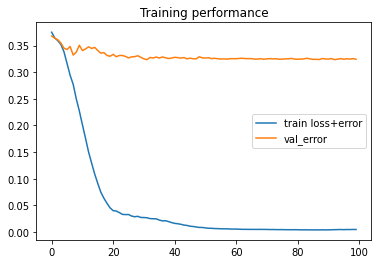

In [10]:
plot_history(history)

In [11]:
clean = mim1.get_clean_data(1)
mim1.plot_imshow(clean[0][0],mim1.model(clean[0])[0],clean[1][0])

In [15]:
print("attack")
att = Attack_handler(nb_epochs= 4,
                     eps = 0.5,
                     adv_train = True ,
                     batch = 64)

d = att.attack(mim1,clean_limit=128,trianed_weight = True)

attack
setting batches
getting clean data form model
train data shape (clean): train  (5, 64, 64, 32, 2)  test (5, 64, 64, 32, 2)
test data shape : train  (1, 64, 64, 32, 2)  test (1, 64, 64, 32, 2)
Train model with adversarial training
  320/50000 [..............................] - ETA: 7:39 - loss: 32.5123Evaluate on clean and adversarial data
deepmimo
   64/50000 [..............................] - ETA: 7:59
test on batch 0
if data was not manipulated 0.017926137894392014 
test acc on clean examples : 0.5489674210548401
test acc on FGM adversarial examples : 0.5489674210548401
test acc on PGD adversarial examples : 0.5489674210548401


In [17]:
print("attack")
att = Attack_handler(nb_epochs= 4,
                     eps = 0.05,
                     adv_train = False ,
                     batch = 64)

d = att.attack(mim1,clean_limit=128,trianed_weight = True)

attack
setting batches
getting clean data form model
train data shape (clean): train  (5, 64, 64, 32, 2)  test (5, 64, 64, 32, 2)
test data shape : train  (1, 64, 64, 32, 2)  test (1, 64, 64, 32, 2)
Train model with adversarial training
  320/50000 [..............................] - ETA: 20s - loss: 35.7264Evaluate on clean and adversarial data
deepmimo
   64/50000 [..............................] - ETA: 9:15
test on batch 0
if data was not manipulated 0.017926137894392014 
test acc on clean examples : 0.5489711761474609
test acc on FGM adversarial examples : 0.5489711761474609
test acc on PGD adversarial examples : 0.5489711761474609


## MIST

In [19]:
mis1 = MIST(k = 100, rate = 1/2 ,
                      SNR_dB_start_Eb = -1 ,
                      SNR_dB_stop_Eb = 7 ,
                      SNR_points = 9 ,
                      n_samples = 10 , 
                      train_batch = 1024,
                      test_batch = 1024,
                      g1=[1,1,1],
                      g2=[1,0,1],)

print("training MIST")
history = mis1.train_gpu(epochs=300,batch_size=1024 )


training MIST
                SNR  0/9
epoch  0/33
1/1 - 1s - loss: 0.3177 - ber: 0.5006 - 1s/epoch - 1s/step
epoch  1/33
1/1 - 0s - loss: 0.3146 - ber: 0.5011 - 150ms/epoch - 150ms/step
epoch  2/33
1/1 - 0s - loss: 0.3095 - ber: 0.4954 - 135ms/epoch - 135ms/step
epoch  3/33
1/1 - 0s - loss: 0.3071 - ber: 0.4936 - 125ms/epoch - 125ms/step
epoch  4/33
1/1 - 0s - loss: 0.3072 - ber: 0.4968 - 125ms/epoch - 125ms/step
epoch  5/33
1/1 - 0s - loss: 0.3031 - ber: 0.4900 - 125ms/epoch - 125ms/step
epoch  6/33
1/1 - 0s - loss: 0.3011 - ber: 0.4900 - 115ms/epoch - 115ms/step
epoch  7/33
1/1 - 0s - loss: 0.2979 - ber: 0.4843 - 116ms/epoch - 116ms/step
epoch  8/33
1/1 - 0s - loss: 0.2961 - ber: 0.4835 - 114ms/epoch - 114ms/step
epoch  9/33
1/1 - 0s - loss: 0.2948 - ber: 0.4822 - 113ms/epoch - 113ms/step
epoch  10/33
1/1 - 0s - loss: 0.2925 - ber: 0.4790 - 105ms/epoch - 105ms/step
epoch  11/33
1/1 - 0s - loss: 0.2907 - ber: 0.4784 - 107ms/epoch - 107ms/step
epoch  12/33
1/1 - 0s - loss: 0.2886 - be

In [23]:
mis1.get_data()

In [24]:
mis1.X_train = mis1.X_train[-1000:]
mis1.y_train = mis1.y_train[-1000:]
clean = mis1.get_clean_data(10)
fig = mis1.plot_imshow(mis1.model(clean[0]),np.round(mis1.model(clean[0])),clean[1],)

In [26]:
##because MIST works in its own way soo it required to produce some additional data test afterwards
# TODO set limit size fore it 
mis1.get_data()

print("attack")
att = Attack_handler(nb_epochs= 10,
                     eps = 0.5,
                     adv_train = True ,
                     batch = 32)

d = att.attack(mis1,clean_limit=300,trianed_weight = True)

attack
setting batches
getting clean data form model
train data shape (clean): train  (0, 32, 33, 1024, 200, 1)  test (0, 32, 33, 1024, 100)
test data shape : train  (2, 32, 200, 1)  test (2, 32, 100)
Train model with adversarial training
Evaluate on clean and adversarial data
mist
   32/50000 [..............................] - ETA: 14:00
test on batch 0
if data was not manipulated 0.0 
test acc on clean examples : 0.0
test acc on FGM adversarial examples : 0.1159375011920929
test acc on PGD adversarial examples : 0.08749999850988388
   64/50000 [..............................] - ETA: 10:48
test on batch 1
if data was not manipulated 0.0 
test acc on clean examples : 0.0
test acc on FGM adversarial examples : 0.13187499344348907
test acc on PGD adversarial examples : 0.10062500089406967


## PE

In [9]:
p1 = PE(proj_path+"/project_3/PE", limit = 10000,
                     execute = {"status":False,"limit":10000,"train_ratio":0.8 ,
                     "train_snr" :np.arange(20, -4, -2)})
history = p1.train_gpu(epochs =50,batch_size=128 ,get_data_build =True)
print("input shape {}".format(p1.X_train.shape))
print("output shape {}".format(p1.y_train.shape))

getting data
Loading Train Data...
Loading test Data...
loading is finished 
start to fit
Epoch 1/50
79/79 - 4s - loss: 0.2459 - ber: 0.4675 - val_loss: 0.2418 - val_ber: 0.4625 - 4s/epoch - 56ms/step
Epoch 2/50
79/79 - 2s - loss: 0.2269 - ber: 0.4260 - val_loss: 0.2353 - val_ber: 0.4431 - 2s/epoch - 19ms/step
Epoch 3/50
79/79 - 1s - loss: 0.1992 - ber: 0.3625 - val_loss: 0.2306 - val_ber: 0.4190 - 1s/epoch - 19ms/step
Epoch 4/50
79/79 - 2s - loss: 0.1791 - ber: 0.3200 - val_loss: 0.2290 - val_ber: 0.4077 - 2s/epoch - 19ms/step
Epoch 5/50
79/79 - 1s - loss: 0.1652 - ber: 0.2892 - val_loss: 0.2262 - val_ber: 0.3962 - 1s/epoch - 19ms/step
Epoch 6/50
79/79 - 2s - loss: 0.1541 - ber: 0.2656 - val_loss: 0.2267 - val_ber: 0.3928 - 2s/epoch - 24ms/step
Epoch 7/50
79/79 - 2s - loss: 0.1452 - ber: 0.2500 - val_loss: 0.2242 - val_ber: 0.3850 - 2s/epoch - 27ms/step
Epoch 8/50
79/79 - 2s - loss: 0.1365 - ber: 0.2318 - val_loss: 0.2234 - val_ber: 0.3780 - 2s/epoch - 24ms/step
Epoch 9/50
79/79 - 2s 

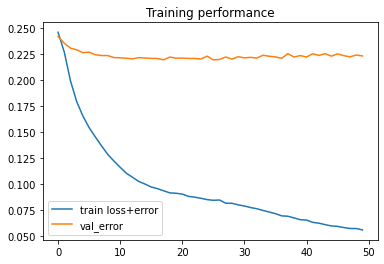

In [10]:
plot_history(history)

In [11]:
clean = p1.get_clean_data(25,400)
fig = p1.plot_imshow(p1.model(clean[0]),np.round(p1.model(clean[0])),clean[1])

In [12]:
print("attack")
att = Attack_handler(nb_epochs= 4,
                     eps = 0.5,
                     adv_train = True ,
                     batch = 64)

d = att.attack(p1,clean_limit=200)

attack
setting batches
getting clean data form model
train data shape (clean): train  (156, 64, 32)  test (156, 64, 16)
test data shape : train  (1, 64, 32)  test (1, 64, 16)
Train model with adversarial training
 9984/50000 [====>.........................] - ETA: 4:41 - loss: 0.2518Evaluate on clean and adversarial data
pe
   64/50000 [..............................] - ETA: 6:48
test on batch 0
if data was not manipulated 0.0 
test acc on clean examples : 0.447265625
test acc on FGM adversarial examples : 0.44921875
test acc on PGD adversarial examples : 0.4482421875
